In [2]:
import pandas as pd

In [3]:
# Data Analysis
file_path = "CO2 Emissions_Canada.csv" # the actual file path

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.shape

(7385, 12)

In [6]:
df= df.drop_duplicates()
df.shape

(6282, 12)

In [7]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [8]:
#Data Preprocessing
df.isnull().sum()


Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

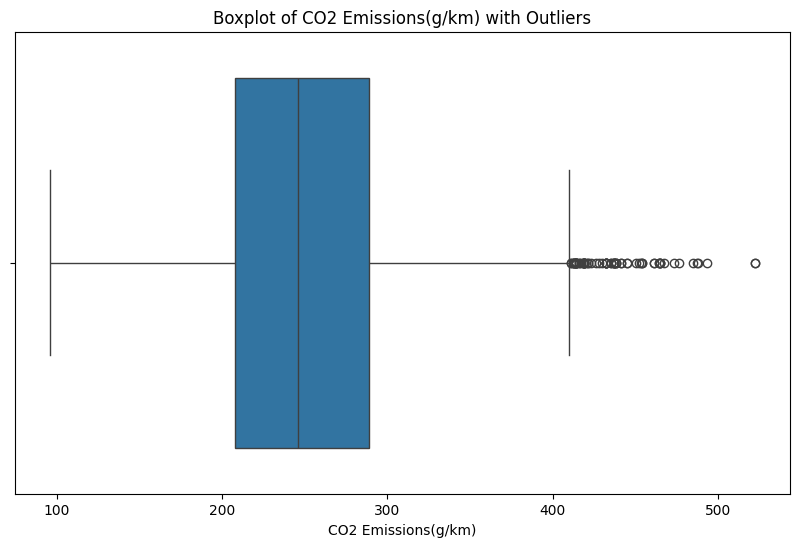

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Identify outliers in 'CO2 Emissions(g/km)'
co2_outliers = df['CO2 Emissions(g/km)']

# Create a boxplot to visualize the distribution and identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=co2_outliers)

# Add a title and labels
plt.title('Boxplot of CO2 Emissions(g/km) with Outliers')
plt.xlabel('CO2 Emissions(g/km)')

# Show the plot
plt.show()
    



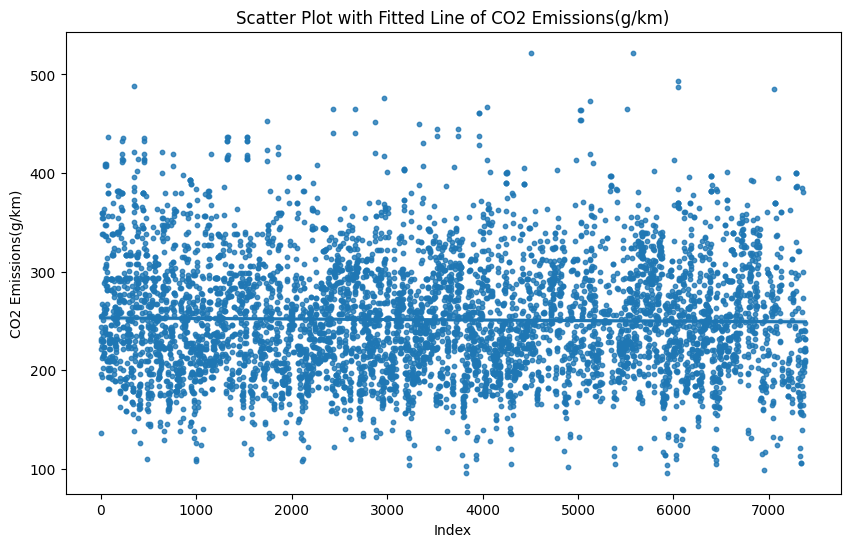

In [10]:
# Create a scatter plot with a fitted line
plt.figure(figsize=(10, 6))
sns.regplot(x=df.index, y='CO2 Emissions(g/km)', data=df, scatter_kws={'s': 10})

# Add a title and labels
plt.title('Scatter Plot with Fitted Line of CO2 Emissions(g/km)')
plt.xlabel('Index')
plt.ylabel('CO2 Emissions(g/km)')

# Show the plot
plt.show()

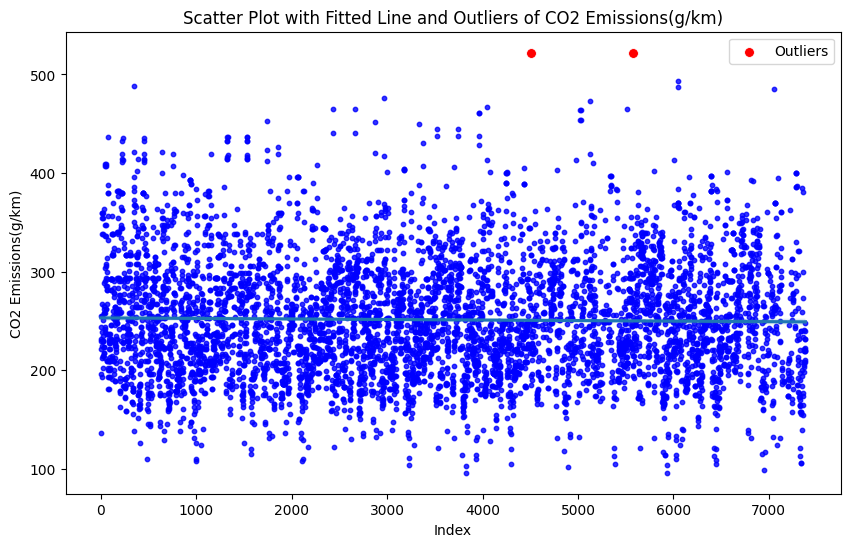

In [11]:
# Identify outliers in 'CO2 Emissions(g/km)'
co2_outliers = df['CO2 Emissions(g/km)']

# Create a scatter plot with a fitted line
plt.figure(figsize=(10, 6))

# Plot all points in blue
sns.regplot(x=df.index, y='CO2 Emissions(g/km)', data=df, scatter_kws={'s': 10, 'color': 'blue'})

# Highlight outliers in red
sns.scatterplot(x=df.index[co2_outliers > 500], y=df['CO2 Emissions(g/km)'][co2_outliers > 500], color='red', s=50, label='Outliers')

# Add a title and labels
plt.title('Scatter Plot with Fitted Line and Outliers of CO2 Emissions(g/km)')
plt.xlabel('Index')
plt.ylabel('CO2 Emissions(g/km)')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [12]:

from scipy.stats import zscore
# Calculate z-scores for 'CO2 Emissions(g/km)'
z_scores = zscore(df['CO2 Emissions(g/km)'])

# Define a threshold for considering z-scores as outliers (e.g., 2 standard deviations)
threshold = 2

# Identify outliers based on z-scores
outliers_z = df[abs(z_scores) > threshold]

print("Outliers identified using z-scores:")
print(outliers_z)

Outliers identified using z-scores:
         Make                Model            Vehicle Class  Engine Size(L)  \
46       AUDI                   R8               TWO-SEATER             4.2   
48       AUDI                   R8               TWO-SEATER             5.2   
50       AUDI            R8 SPYDER               TWO-SEATER             4.2   
52       AUDI            R8 SPYDER               TWO-SEATER             5.2   
72    BENTLEY      CONTINENTAL GTC               SUBCOMPACT             6.0   
...       ...                  ...                      ...             ...   
7326   TOYOTA  Camry Hybrid XLE/SE                 MID-SIZE             2.5   
7335   TOYOTA       Corolla Hybrid                  COMPACT             1.8   
7341   TOYOTA                Prius                 MID-SIZE             1.8   
7348   TOYOTA          Sequoia 4WD           SUV - STANDARD             5.7   
7357   TOYOTA           Tundra 4WD  PICKUP TRUCK - STANDARD             5.7   

      Cylinders

In [13]:
 #Calculate the interquartile range (IQR) for 'CO2 Emissions(g/km)'
Q1 = df['CO2 Emissions(g/km)'].quantile(0.25)
Q3 = df['CO2 Emissions(g/km)'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for considering values as outliers (e.g., 1.5 times IQR)
threshold_iqr = 1.5

# Identify outliers based on IQR
outliers_iqr = df[(df['CO2 Emissions(g/km)'] < Q1 - threshold_iqr * IQR) | (df['CO2 Emissions(g/km)'] > Q3 + threshold_iqr * IQR)]

print("Outliers identified using IQR:")
print(outliers_iqr)

Outliers identified using IQR:
             Make                         Model    Vehicle Class  \
75        BENTLEY                      MULSANNE         MID-SIZE   
223     CHEVROLET        EXPRESS 2500 PASSENGER  VAN - PASSENGER   
224     CHEVROLET        EXPRESS 2500 PASSENGER  VAN - PASSENGER   
225     CHEVROLET        EXPRESS 2500 PASSENGER  VAN - PASSENGER   
226     CHEVROLET        EXPRESS 3500 PASSENGER  VAN - PASSENGER   
...           ...                           ...              ...   
5575      BUGATTI                        Chiron       TWO-SEATER   
6010         JEEP  Grand Cherokee 4X4 Trackhawk   SUV - STANDARD   
6045  LAMBORGHINI               Aventador Coupe       TWO-SEATER   
6046  LAMBORGHINI            Aventador Roadster       TWO-SEATER   
7058  LAMBORGHINI               Aventador Coupe       TWO-SEATER   

      Engine Size(L)  Cylinders Transmission Fuel Type  \
75               6.8          8          AS8         Z   
223              4.8          8     

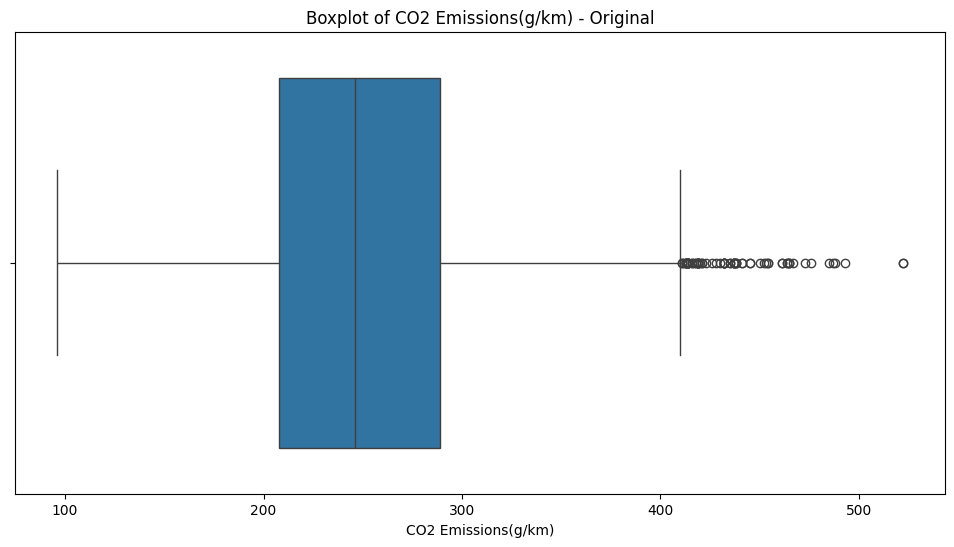

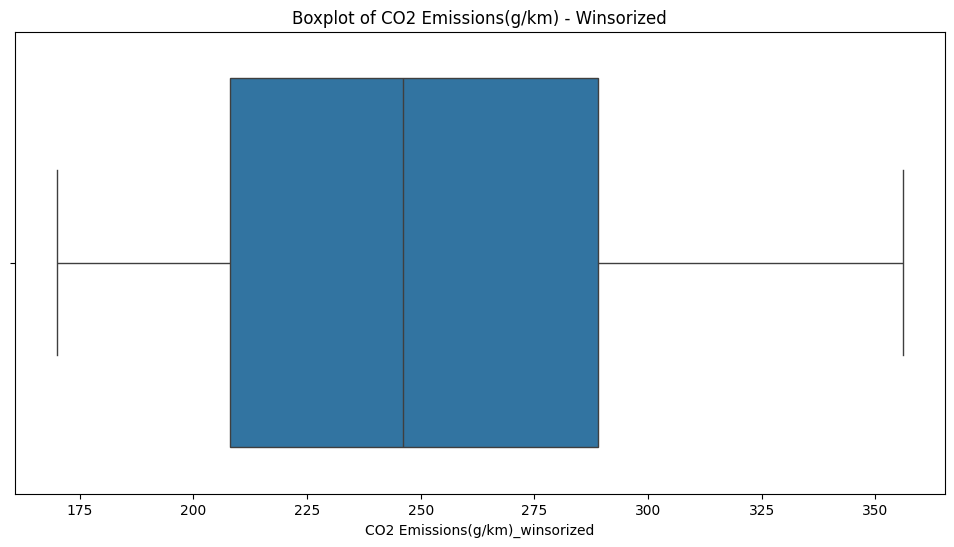

Before Winsorizing:
    Make       Model  CO2 Emissions(g/km)
0  ACURA         ILX                  196
1  ACURA         ILX                  221
2  ACURA  ILX HYBRID                  136
3  ACURA     MDX 4WD                  255
4  ACURA     RDX AWD                  244

After Winsorizing:
    Make       Model  CO2 Emissions(g/km)_winsorized
0  ACURA         ILX                             196
1  ACURA         ILX                             221
2  ACURA  ILX HYBRID                             170
3  ACURA     MDX 4WD                             255
4  ACURA     RDX AWD                             244


In [14]:
from scipy.stats.mstats import winsorize

# Visualize the original distribution with a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['CO2 Emissions(g/km)'])
plt.title('Boxplot of CO2 Emissions(g/km) - Original')
plt.show()

# Winsorize the 'CO2 Emissions(g/km)' column
df['CO2 Emissions(g/km)_winsorized'] = winsorize(df['CO2 Emissions(g/km)'], limits=[0.05, 0.05])

# Visualize the distribution after winsorizing with a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['CO2 Emissions(g/km)_winsorized'])
plt.title('Boxplot of CO2 Emissions(g/km) - Winsorized')
plt.show()

# Display the first few rows of the DataFrame before and after winsorizing
print("Before Winsorizing:")
print(df[['Make', 'Model', 'CO2 Emissions(g/km)']].head())

print("\nAfter Winsorizing:")
print(df[['Make', 'Model', 'CO2 Emissions(g/km)_winsorized']].head())

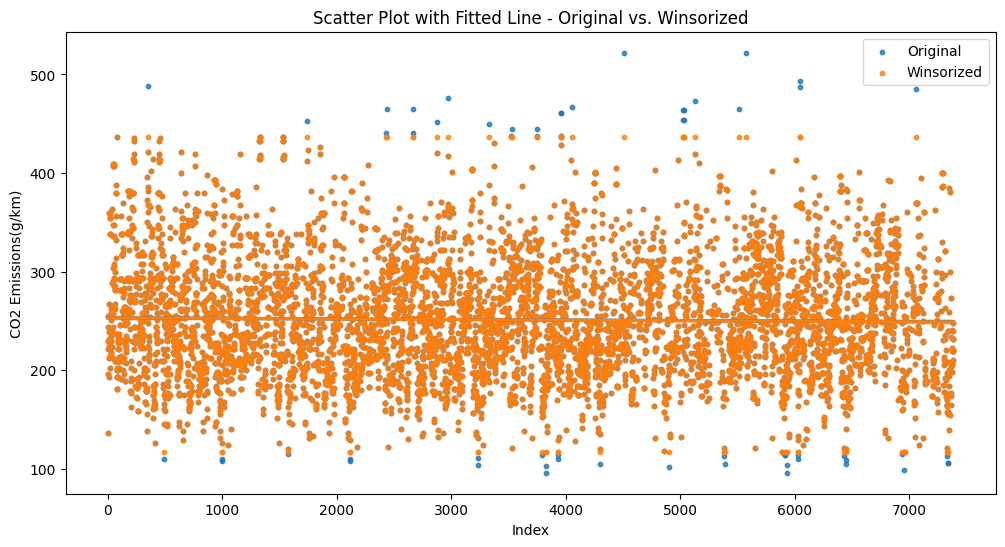

In [15]:
# Create a scatter plot with a fitted line before winsorizing
plt.figure(figsize=(12, 6))
sns.regplot(x=df.index, y='CO2 Emissions(g/km)', data=df, scatter_kws={'s': 10}, label='Original')

# Winsorize the 'CO2 Emissions(g/km)' column
df['CO2 Emissions(g/km)_winsorized'] = winsorize(df['CO2 Emissions(g/km)'], limits=[0.005, 0.005])

# Create a scatter plot with a fitted line after winsorizing
sns.regplot(x=df.index, y='CO2 Emissions(g/km)_winsorized', data=df, scatter_kws={'s': 10}, label='Winsorized')

# Add a title and labels
plt.title('Scatter Plot with Fitted Line - Original vs. Winsorized')
plt.xlabel('Index')
plt.ylabel('CO2 Emissions(g/km)')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [16]:
df_winsorized = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_winsorized['CO2 Emissions(g/km)'] = winsorize(df['CO2 Emissions(g/km)'], limits=[0.005, 0.005])


In [17]:
df_winsorized.shape

(6282, 13)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

# Define bins for categorizing CO2 emissions
bins = [0, 150, 250, float('inf')]

# Define corresponding labels for the emission categories
labels = ['Low Emissions', 'Medium Emissions', 'High Emissions']

# Create a new column 'Emissions Category' in the DataFrame 'df_winsorized'
# Assign each row in this column based on which bin the corresponding 'CO2 Emissions(g/km)' value falls into
df_winsorized['Emissions Category'] = pd.cut(df_winsorized['CO2 Emissions(g/km)'], bins=bins, labels=labels)


# Select the independent variable (X) and the target variable (y)
X = df_winsorized[['Engine Size(L)']]  # Features
y = df_winsorized['Emissions Category']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print('\nRandom Forest Classifier:\n')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')




Random Forest Classifier:

Accuracy: 0.8448687350835322
Confusion Matrix:
[[570   0  34]
 [  0   1  25]
 [133   3 491]]
Classification Report:
                  precision    recall  f1-score   support

  High Emissions       0.81      0.94      0.87       604
   Low Emissions       0.25      0.04      0.07        26
Medium Emissions       0.89      0.78      0.83       627

        accuracy                           0.84      1257
       macro avg       0.65      0.59      0.59      1257
    weighted avg       0.84      0.84      0.84      1257



In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create discrete classes for CO2 Emissions 
bins = [0, 150, 250, float('inf')]
labels = ['Low Emissions', 'Medium Emissions', 'High Emissions']
df['Emissions Category'] = pd.cut(df['CO2 Emissions(g/km)'], bins=bins, labels=labels)

# Additional feature: Creating a new feature by combining 'Cylinders' and 'Engine Size(L)'
df['Cylinders_Engine_Size'] = df['Cylinders'] * df['Engine Size(L)']

# Extract transmission type and number of gears
df['Transmission_Type'] = df['Transmission'].str.extract('([A-Za-z]+)')
df['Number_of_Gears'] = df['Transmission'].str.extract('(\d+)').astype(float)

# Encoding 'Transmission_Type' into numerical values
transmission_mapping = {
    'A': 1,
    'AM': 2,
    'AS': 3,
    'AV': 4,
    'M': 5
}
df['Transmission_Type_Encoded'] = df['Transmission_Type'].apply(lambda x: transmission_mapping.get(x, 0))

# Encoding 'Fuel Type' into numerical values
fuel_mapping = {
    'X': 1,
    'Z': 2,
    'D': 3,
    'E': 4,
    'N': 5
}
df['Fuel_Type_Encoded'] = df['Fuel Type'].apply(lambda x: fuel_mapping.get(x, 0))

# Select features and target variable
X = df[['Engine Size(L)', 'Cylinders', 'Cylinders_Engine_Size', 'Transmission_Type_Encoded', 'Number_of_Gears', 'Fuel_Type_Encoded', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
y = df['Emissions Category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in X_train
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)

# fit model with the imputed data
rf_classifier = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train_imputed, y_train)

# Handle missing values in X_test using the imputer fitted on X_train
X_test_imputed = imputer.transform(X_test)

# Make predictions on the imputed test data
y_rf_pred = rf_grid_search.predict(X_test_imputed)

# Evaluate the Random Forest model performance
accuracy_rf = accuracy_score(y_test, y_rf_pred)
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
class_report_rf = classification_report(y_test, y_rf_pred)

print('\nFinal Random Forest Classifier with Extended Features and Hyperparameter Tuning:\n')
print(f'Best Hyperparameters: {rf_grid_search.best_params_}')
print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{class_report_rf}')



Final Random Forest Classifier with Extended Features and Hyperparameter Tuning:

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.9904534606205251
Confusion Matrix:
[[597   0   7]
 [  0  26   0]
 [  5   0 622]]
Classification Report:
                  precision    recall  f1-score   support

  High Emissions       0.99      0.99      0.99       604
   Low Emissions       1.00      1.00      1.00        26
Medium Emissions       0.99      0.99      0.99       627

        accuracy                           0.99      1257
       macro avg       0.99      0.99      0.99      1257
    weighted avg       0.99      0.99      0.99      1257



In [20]:
#for winsorized random

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create discrete classes for CO2 Emissions 
bins = [0, 150, 250, float('inf')]
labels = ['Low Emissions', 'Medium Emissions', 'High Emissions']
df_winsorized['Emissions Category'] = pd.cut(df_winsorized['CO2 Emissions(g/km)'], bins=bins, labels=labels)

# Additional feature: Creating a new feature by combining 'Cylinders' and 'Engine Size(L)'
df_winsorized['Cylinders_Engine_Size'] = df_winsorized['Cylinders'] * df['Engine Size(L)']

# Extract transmission type and number of gears
df_winsorized['Transmission_Type'] = df_winsorized['Transmission'].str.extract('([A-Za-z]+)')
df_winsorized['Number_of_Gears'] = df_winsorized['Transmission'].str.extract('(\d+)').astype(float)

# Encoding 'Transmission_Type' into numerical values
transmission_mapping = {
    'A': 1,
    'AM': 2,
    'AS': 3,
    'AV': 4,
    'M': 5
}
df_winsorized['Transmission_Type_Encoded'] = df['Transmission_Type'].apply(lambda x: transmission_mapping.get(x, 0))

# Encoding 'Fuel Type' into numerical values
fuel_mapping = {
    'X': 1,
    'Z': 2,
    'D': 3,
    'E': 4,
    'N': 5
}
df_winsorized['Fuel_Type_Encoded'] = df_winsorized['Fuel Type'].apply(lambda x: fuel_mapping.get(x, 0))

# Select features and target variable
X = df_winsorized[['Engine Size(L)', 'Cylinders', 'Cylinders_Engine_Size', 'Transmission_Type_Encoded', 'Number_of_Gears', 'Fuel_Type_Encoded', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
y = df_winsorized['Emissions Category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in X_train
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)

#fit model with the imputed data
rf_classifier = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train_imputed, y_train)

# Handle missing values in X_test using the imputer fitted on X_train
X_test_imputed = imputer.transform(X_test)

# Make predictions on the imputed test data
y_rf_pred = rf_grid_search.predict(X_test_imputed)

# Evaluate the Random Forest model performance
accuracy_rf = accuracy_score(y_test, y_rf_pred)
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
class_report_rf = classification_report(y_test, y_rf_pred)

print('\nFinal Random Forest Classifier with Extended Features and Hyperparameter Tuning:\n')
print(f'Best Hyperparameters: {rf_grid_search.best_params_}')
print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{class_report_rf}')



Final Random Forest Classifier with Extended Features and Hyperparameter Tuning:

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.9904534606205251
Confusion Matrix:
[[597   0   7]
 [  0  26   0]
 [  5   0 622]]
Classification Report:
                  precision    recall  f1-score   support

  High Emissions       0.99      0.99      0.99       604
   Low Emissions       1.00      1.00      1.00        26
Medium Emissions       0.99      0.99      0.99       627

        accuracy                           0.99      1257
       macro avg       0.99      0.99      0.99      1257
    weighted avg       0.99      0.99      0.99      1257



In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

# Define bins for categorizing CO2 emissions
bins = [0, 150, 250, float('inf')]

# Define corresponding labels for the emission categories
labels = ['Low Emissions', 'Medium Emissions', 'High Emissions']

# Create a new column 'Emissions Category' in the DataFrame 'df_winsorized'
# Assign each row in this column based on which bin the corresponding 'CO2 Emissions(g/km)' value falls into
df_winsorized['Emissions Category'] = pd.cut(df_winsorized['CO2 Emissions(g/km)'], bins=bins, labels=labels)

# Select the independent variable (X) and the target variable (y)
X = df_winsorized[['Engine Size(L)']]  # Features
y = df_winsorized['Emissions Category']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print('\nSVM Classifier:\n')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')



SVM Classifier:

Accuracy: 0.8337311058074781
Confusion Matrix:
[[555   0  49]
 [  0   0  26]
 [134   0 493]]
Classification Report:
                  precision    recall  f1-score   support

  High Emissions       0.81      0.92      0.86       604
   Low Emissions       0.00      0.00      0.00        26
Medium Emissions       0.87      0.79      0.83       627

        accuracy                           0.83      1257
       macro avg       0.56      0.57      0.56      1257
    weighted avg       0.82      0.83      0.82      1257



c:\Users\victo\Downloads\python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\Downloads\python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\Downloads\python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

bins = [0, 150, 250, float('inf')]
labels = ['Low Emissions', 'Medium Emissions', 'High Emissions']
df_winsorized['Emissions Category'] = pd.cut(df_winsorized['CO2 Emissions(g/km)'], bins=bins, labels=labels)

# Select the independent variable (X) and the target variable (y)
X = df_winsorized[['Engine Size(L)']]  # Features
y = df_winsorized['Emissions Category']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with regularization (adjust the C parameter)
svm_classifier = SVC(C=0.001, kernel='linear', random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = svm_classifier.predict(X_train)

# Make predictions on the test data
y_test_pred = svm_classifier.predict(X_test)

# Evaluate the model performance on the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

# Evaluate the model performance on the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

# Display results
print('\nSVM Classifier - Training Results:\n')
print(f'Training Accuracy: {accuracy_train}')
print(f'Confusion Matrix:\n{conf_matrix_train}')
print(f'Classification Report:\n{class_report_train}')

print('\nSVM Classifier - Testing Results:\n')
print(f'Testing Accuracy: {accuracy_test}')
print(f'Confusion Matrix:\n{conf_matrix_test}')
print(f'Classification Report:\n{class_report_test}')



SVM Classifier - Training Results:

Training Accuracy: 0.8178303388674096
Confusion Matrix:
[[1587    0  450]
 [   0    0   97]
 [ 254    0 2009]]
Classification Report:
                  precision    recall  f1-score   support

  High Emissions       0.86      0.78      0.82      2037
   Low Emissions       0.00      0.00      0.00        97
Medium Emissions       0.79      0.89      0.83      2263

        accuracy                           0.82      4397
       macro avg       0.55      0.56      0.55      4397
    weighted avg       0.80      0.82      0.81      4397


SVM Classifier - Testing Results:

Testing Accuracy: 0.823342175066313
Confusion Matrix:
[[713   0 190]
 [  0   0  37]
 [106   0 839]]
Classification Report:
                  precision    recall  f1-score   support

  High Emissions       0.87      0.79      0.83       903
   Low Emissions       0.00      0.00      0.00        37
Medium Emissions       0.79      0.89      0.83       945

        accuracy           

c:\Users\victo\Downloads\python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\Downloads\python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\Downloads\python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\Downloads\python\Li

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

bins = [0, 150, 250, float('inf')]
labels = ['Low Emissions', 'Medium Emissions', 'High Emissions']
df_winsorized['Emissions Category'] = pd.cut(df_winsorized['CO2 Emissions(g/km)'], bins=bins, labels=labels)

# Select the independent variable (X) and the target variable (y)
X = df_winsorized[['Engine Size(L)']]  # Features
y = df_winsorized['Emissions Category']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print('\nSVM Classifier:\n')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')



SVM Classifier:

Accuracy: 0.8337311058074781
Confusion Matrix:
[[555   0  49]
 [  0   0  26]
 [134   0 493]]
Classification Report:
                  precision    recall  f1-score   support

  High Emissions       0.81      0.92      0.86       604
   Low Emissions       0.00      0.00      0.00        26
Medium Emissions       0.87      0.79      0.83       627

        accuracy                           0.83      1257
       macro avg       0.56      0.57      0.56      1257
    weighted avg       0.82      0.83      0.82      1257



c:\Users\victo\Downloads\python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\Downloads\python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\Downloads\python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create discrete classes for CO2 Emissions 
bins = [0, 150, 250, float('inf')]
labels = ['Low Emissions', 'Medium Emissions', 'High Emissions']
df['Emissions Category'] = pd.cut(df['CO2 Emissions(g/km)'], bins=bins, labels=labels)

# Additional feature: Creating a new feature by combining 'Cylinders' and 'Engine Size(L)'
df['Cylinders_Engine_Size'] = df['Cylinders'] * df['Engine Size(L)']

# Extract transmission type and number of gears
df['Transmission_Type'] = df['Transmission'].str.extract('([A-Za-z]+)')
df['Number_of_Gears'] = df['Transmission'].str.extract('(\d+)').astype(float)

# Encoding 'Transmission_Type' into numerical values
transmission_mapping = {
    'A': 1,
    'AM': 2,
    'AS': 3,
    'AV': 4,
    'M': 5
}

df['Transmission_Type_Encoded'] = df['Transmission_Type'].apply(lambda x: transmission_mapping.get(x, 0))

# Encoding 'Fuel Type' into numerical values
fuel_mapping = {
    'X': 1,
    'Z': 2,
    'D': 3,
    'E': 4,
    'N': 5
}
df['Fuel_Type_Encoded'] = df['Fuel Type'].apply(lambda x: fuel_mapping.get(x, 0))

# Select features and target variable
X = df[['Engine Size(L)', 'Cylinders', 'Cylinders_Engine_Size', 'Transmission_Type_Encoded', 'Number_of_Gears', 'Fuel_Type_Encoded', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
y = df['Emissions Category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in X_train
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)

# Fit model with the imputed data using SVM classifier
svm_classifier = SVC(random_state=42)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=3, scoring='accuracy')
svm_grid_search.fit(X_train_imputed, y_train)

# Handle missing values in X_test using the imputer fitted on X_train
X_test_imputed = imputer.transform(X_test)

# Make predictions on the imputed test data
y_svm_pred = svm_grid_search.predict(X_test_imputed)

# Evaluate the SVM model performance
accuracy_svm = accuracy_score(y_test, y_svm_pred)
conf_matrix_svm = confusion_matrix(y_test, y_svm_pred)
class_report_svm = classification_report(y_test, y_svm_pred)

print('\nFinal SVM Classifier with Extended Features and Hyperparameter Tuning:\n')
print(f'Best Hyperparameters: {svm_grid_search.best_params_}')
print(f'Accuracy: {accuracy_svm}')
print(f'Confusion Matrix:\n{conf_matrix_svm}')
print(f'Classification Report:\n{class_report_svm}')



Final SVM Classifier with Extended Features and Hyperparameter Tuning:

Best Hyperparameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy: 0.9856801909307876
Confusion Matrix:
[[598   0   6]
 [  0  25   1]
 [ 10   1 616]]
Classification Report:
                  precision    recall  f1-score   support

  High Emissions       0.98      0.99      0.99       604
   Low Emissions       0.96      0.96      0.96        26
Medium Emissions       0.99      0.98      0.99       627

        accuracy                           0.99      1257
       macro avg       0.98      0.98      0.98      1257
    weighted avg       0.99      0.99      0.99      1257



In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create discrete classes for CO2 Emissions 
bins = [0, 150, 250, float('inf')]
labels = ['Low Emissions', 'Medium Emissions', 'High Emissions']
df_winsorized['Emissions Category'] = pd.cut(df_winsorized['CO2 Emissions(g/km)'], bins=bins, labels=labels)

# Additional feature: Creating a new feature by combining 'Cylinders' and 'Engine Size(L)'
df_winsorized['Cylinders_Engine_Size'] = df['Cylinders'] * df_winsorized['Engine Size(L)']

# Extract transmission type and number of gears
df_winsorized['Transmission_Type'] = df_winsorized['Transmission'].str.extract('([A-Za-z]+)')
df_winsorized['Number_of_Gears'] = df_winsorized['Transmission'].str.extract('(\d+)').astype(float)

# Encoding 'Transmission_Type' into numerical values
transmission_mapping = {
    'A': 1,
    'AM': 2,
    'AS': 3,
    'AV': 4,
    'M': 5
}
df_winsorized['Transmission_Type_Encoded'] = df_winsorized['Transmission_Type'].apply(lambda x: transmission_mapping.get(x, 0))

# Encoding 'Fuel Type' into numerical values
fuel_mapping = {
    'X': 1,
    'Z': 2,
    'D': 3,
    'E': 4,
    'N': 5
}
df_winsorized['Fuel_Type_Encoded'] = df_winsorized['Fuel Type'].apply(lambda x: fuel_mapping.get(x, 0))

# Select features and target variable
X = df_winsorized[['Engine Size(L)', 'Cylinders', 'Cylinders_Engine_Size', 'Transmission_Type_Encoded', 'Number_of_Gears', 'Fuel_Type_Encoded', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
y = df_winsorized['Emissions Category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in X_train
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)

#fit model with the imputed data using SVM classifier
svm_classifier = SVC(random_state=42)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=3, scoring='accuracy')
svm_grid_search.fit(X_train_imputed, y_train)

# Handle missing values in X_test using the imputer fitted on X_train
X_test_imputed = imputer.transform(X_test)

# Make predictions on the imputed test data
y_svm_pred = svm_grid_search.predict(X_test_imputed)

# Evaluate the SVM model performance
accuracy_svm = accuracy_score(y_test, y_svm_pred)
conf_matrix_svm = confusion_matrix(y_test, y_svm_pred)
class_report_svm = classification_report(y_test, y_svm_pred)

print('\nFinal SVM Classifier with Extended Features and Hyperparameter Tuning:\n')
print(f'Best Hyperparameters: {svm_grid_search.best_params_}')
print(f'Accuracy: {accuracy_svm}')
print(f'Confusion Matrix:\n{conf_matrix_svm}')
print(f'Classification Report:\n{class_report_svm}')



Final SVM Classifier with Extended Features and Hyperparameter Tuning:

Best Hyperparameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy: 0.9856801909307876
Confusion Matrix:
[[598   0   6]
 [  0  25   1]
 [ 10   1 616]]
Classification Report:
                  precision    recall  f1-score   support

  High Emissions       0.98      0.99      0.99       604
   Low Emissions       0.96      0.96      0.96        26
Medium Emissions       0.99      0.98      0.99       627

        accuracy                           0.99      1257
       macro avg       0.98      0.98      0.98      1257
    weighted avg       0.99      0.99      0.99      1257

